In [19]:
import ontopy;
from ontopy import get_ontology
from ontopy.graph import OntoGraph, cytoscapegraph
import ipywidgets as widgets
import owlready2

print('ontopy imported successfully')
from ontopy import get_ontology

from ontopy import World
world = World()
emmo = world.get_ontology('emmo-inferred').load()
print(f"Ontology IRI: {emmo.base_iri}")

relationship = world.get_ontology('../relationship.ttl').load()
instances = world.get_ontology('../client-eg1.ttl').load()

print(f"Ontology IRI: {relationship.base_iri}")


ontopy imported successfully
Ontology IRI: https://w3id.org/emmo#
Ontology IRI: http://example.org/owl-client-relationship#


In [20]:
with relationship:
    class Team(relationship.Collection):
        '''Collection of people that form a team'''
    
    
    class Person(relationship.Interpreter):
        '''A person'''
        
    class SINTEFPerson(relationship.Person):
        '''A person that works at SINTEF'''
    
    class SINTEFIndustryPerson(relationship.SINTEFPerson):
        '''A person that works at SINTEF Industry'''
    
    class SINTEFOceanPerson(relationship.SINTEFPerson):
        '''A person that works at SINTEF Ocean'''
    
    #class Researcher(relationship.Person):
    #    '''A Researcher'''
        
    #class Developer(relationship.Person):
    #    '''A developer'''
    
    class Thomas(relationship.SINTEFOceanPerson):
        '''Ontologist, Software developer, Software architect'''
        annotations = ['A docker enthusiast']
        annotations.append('Plays guitar')
        #is_a = [relationship.Developer]
        
    class Jesper(relationship.SINTEFIndustryPerson):
        '''Atom scale modeller, Aluminum expert, Ontologist, EMMO core developer'''
        annotations = ['A kayakiing enthusiast',
                   'Has a biliards table in his living room']
                   
        
        #is_a = [relationship.Researcher]
    
    class Petter(relationship.SINTEFOceanPerson):
        '''Software team manager, developer'''
        annotations = ['Aerospace enthusiast']
        annotations.append('Agile-devops enthusiast')
        annotations.append('A runner and has a cat')
        #is_a = [relationship.Developer]
        
    class Treesa(relationship.SINTEFOceanPerson):
        '''Developer'''
        annotations = ['Is a go-kart enthusiast']
        #is_a = [relationship.Developer]

    class Sylvain(relationship.SINTEFIndustryPerson):
        '''Ontologist'''
        annotations = ['Is a ping-pong enthusiast']
        #is_a = [relationship.Researcher]
        
    class BjornTore(relationship.SINTEFIndustryPerson):
        '''Process chemist'''
        annotations = ['A skiing enthusiast']
        #is_a = [relationship.Researcher]
     
    class Francesca(relationship.SINTEFIndustryPerson):
        '''Chemist, Atom scale modeler, Catalysis expert'''
        annotations = ['Has too many hobbies']
        annotations.append('Plays violin')
        annotations.append('Sews, knits, spins, makes pottery')
        #is_a = [relationship.Researcher]
        
    class Team40(relationship.Team):
        '''A team that solve all problems 4.0'''
        is_a = [relationship.hasProperPart.some(relationship.Thomas),
                relationship.hasProperPart.some(relationship.Petter),
                relationship.hasProperPart.some(relationship.Treesa),
                relationship.hasProperPart.some(relationship.Jesper),
                relationship.hasProperPart.some(relationship.Sylvain),
                relationship.hasProperPart.some(relationship.BjornTore),
                relationship.hasProperPart.some(relationship.Francesca),
               ]
relationship.sync_attributes(class_docstring='elucidation')
relationship.sync_attributes(name_policy='uuid', name_prefix='EMMO_')

In [21]:
g = OntoGraph(relationship, relationship.Person, parents=1, relations='all', edgelabels=True, addnodes=True)

print(f"Graph nodes: {len(g.nodes)}")
print(f"Graph edges: {len(g.edges)}")
print("First few nodes:", list(g.nodes)[:5])


Graph nodes: 18
Graph edges: 17
First few nodes: ['Treesa', 'BjornTore', 'ConsultantManager', 'Thomas', 'Jesper']


/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation isInterpretedBy. Resorting to default style.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation hasInterpreter. Resorting to default style.
  warnings.warn(


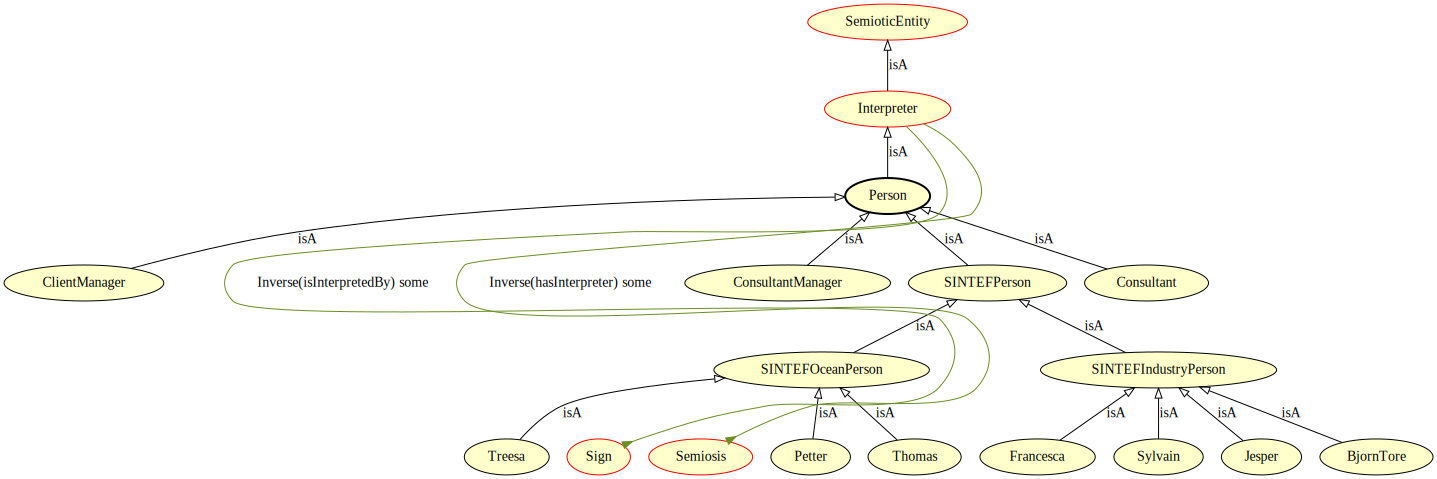

In [22]:
try:
    g.dot.render(format='svg', view=False)
    from IPython.display import SVG, display
    display(SVG(g.dot.pipe(format='svg')))
except:
    print("Graphviz not available, showing source code instead:")
    print(g.dot.source)

In [ ]:
g = OntoGraph(relationship, relationship.Person, parents=3, relations='all', edgelabels=True, addnodes=True)
graph = cytoscapegraph(g, onto=relationship)
display(graph)

/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation isInterpretedBy. Resorting to default style.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/ontopy/graph.py:740: UserWarning: Style not defined for relation hasInterpreter. Resorting to default style.
  warnings.warn(


TypeError: 'NoneType' object is not callable

In [ ]:
classes = list(relationship.classes())

# g = OntoGraph(relationship, relations='all', addnodes=True, edgelabels=True)
g = OntoGraph(relationship, relationship.Team, parents=3, relations='all', edgelabels=True, addnodes=True)

graph = cytoscapegraph(g, onto=relationship)
display(graph)